In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC



In [2]:
# Loading the dataset
df = pd.read_csv('D:/Python Lectures/Data/mobile_train.csv')

In [3]:
#view first five rows of dataframe
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# gives shape of dataframe(rows x columns)
df.shape

(2000, 21)

In [8]:
#lets check how much mobiles in our dataframe which has range:3
a=df[df.price_range==3]
len(a)

500

In [5]:
#basic information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
#Basic statistics on all numeric columns
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
#let's check the unique values in column: 'price_range'
price = np.array(df['price_range'])
np.unique(price)

array([0, 1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

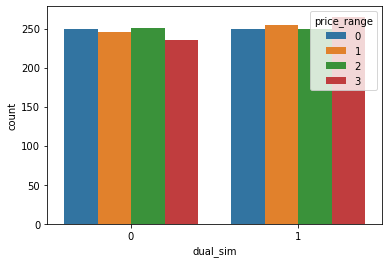

In [8]:
#ploting the count plot for dual_sim with price_range as hue
sns.countplot(x='dual_sim',hue='price_range',data=df)

<AxesSubplot:xlabel='four_g', ylabel='price_range'>

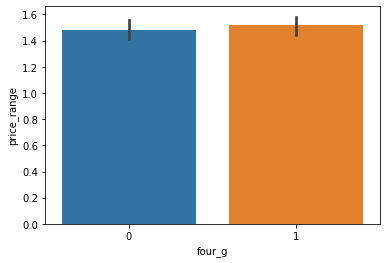

In [9]:
#Barplot indicating the price range for mobiles which has 4G-support and does not have 4G spport
sns.barplot(x="four_g",y='price_range',data=df)

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

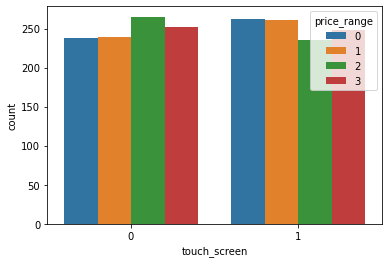

In [10]:
sns.countplot(x='touch_screen',hue='price_range',data=df)

In [11]:
# let's check the correaltion of our data
price_corr = df[['battery_power','dual_sim','four_g','int_memory','mobile_wt',"ram",'n_cores','touch_screen','price_range']].corr()
price_corr


,battery_power,dual_sim,four_g,int_memory,mobile_wt,ram,n_cores,touch_screen,price_range
battery_power,1.000000,-0.041847,0.015665,-0.004004,0.001844,-0.000653,-0.029727,-0.010516,0.200723
dual_sim,-0.041847,1.000000,0.003187,-0.015679,-0.008979,0.041072,-0.024658,-0.017117,0.017444
four_g,0.015665,0.003187,1.000000,0.008690,-0.016537,0.007313,-0.029706,0.016758,0.014772
int_memory,-0.004004,-0.015679,0.008690,1.000000,-0.034214,0.032813,-0.028310,-0.026999,0.044435
mobile_wt,0.001844,-0.008979,-0.016537,-0.034214,1.000000,-0.002581,-0.018989,-0.014368,-0.030302
ram,-0.000653,0.041072,0.007313,0.032813,-0.002581,1.000000,0.004868,-0.030455,0.917046
n_cores,-0.029727,-0.024658,-0.029706,-0.028310,-0.018989,0.004868,1.000000,0.023774,0.004399
touch_screen,-0.010516,-0.017117,0.016758,-0.026999,-0.014368,-0.030455,0.023774,1.000000,-0.030411
price_range,0.200723,0.017444,0.014772,0.044435,-0.030302,0.917046,0.004399,-0.030411,1.000000


Text(0.5, 1.0, 'Correlation')

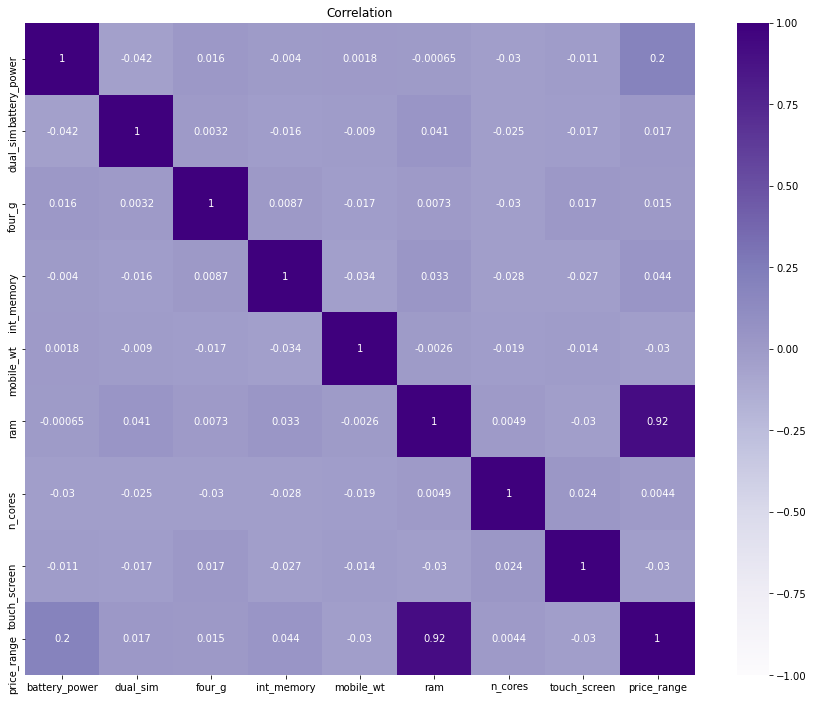

In [17]:
#As we can see our target price range has highly positive correlation between ram. 
fig = plt.figure(figsize=(15,12))
a=sns.heatmap(price_corr,annot=True,vmin=-1,cmap='Purples')

a.set_title('Correlation')


<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

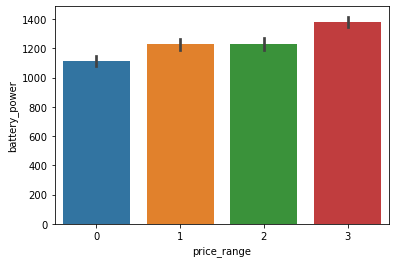

In [13]:
#ploting bar plot according to price range
sns.barplot(x='price_range',y='battery_power',data=df)

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

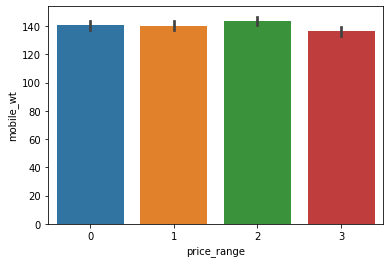

In [14]:
#ploting bar plot to check the price range with price range 
sns.barplot(x='price_range',y='mobile_wt',data=df)

In [15]:
ts=df['touch_screen'].isin([1])
print(len(ts))


2000


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='touch_screen', ylabel='count'>

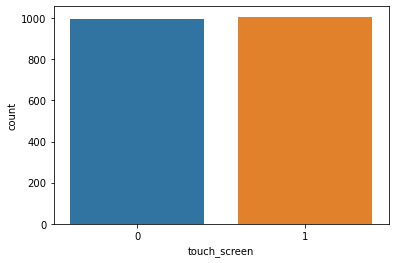

In [16]:
#Let's see the count of the mobiles which has touch screen and moblies which not have touch screen
sns.countplot(df['touch_screen'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

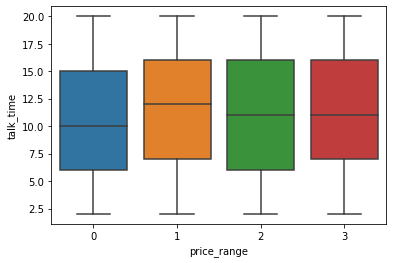

In [18]:
sns.boxplot(df['price_range'],df['talk_time'])

Phones that supports 3G

In [20]:
labels = ['3G-support','Not Supported']
values = df['three_g'].value_counts().values

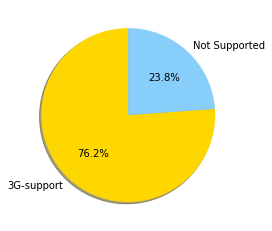

In [33]:
fig ,ax1 = plt.subplots()
colors = ['gold','lightskyblue']
ax1.pie(values,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90,colors=colors)
plt.show()

Phones that supports 4G

In [34]:
labels = ['4G-support','Not Supported']
values = df['four_g'].value_counts().values

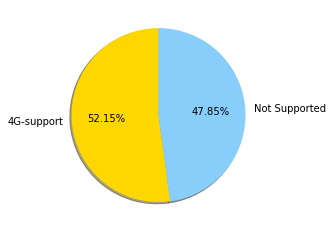

In [55]:
fig ,ax1 = plt.subplots()
colors = ['gold','lightskyblue']
ax1.pie(values,labels=labels,autopct="%1.2f%%",shadow=True,startangle=90,colors=colors)
plt.show()

StandardScaler : to get all the values in a standard format we use standard scaler such as we have values different for battery_power, ram, price_range  
so this values will get into a standard format between 0 and 1  
percentage value but in between 0 and 1 not 100.


## Model Building

In [62]:
scaler = StandardScaler()
x = df.drop('price_range',axis=1)
y = df['price_range']#0, 1,2,3 classification clusters


scaler.fit(x)
x_transformed = scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.3)


In [65]:
model = SVC()
model.fit(x_train,y_train)
y_trian_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Train set accuracy: '+str(accuracy_score(y_trian_pred,y_train)*100))
print('Test set accuracy: '+str(accuracy_score(y_test_pred,y_test)*100))
print('Confusion MAtrix: \n%s'%confusion_matrix(y_test_pred,y_test))
print('\nClassificaiton Report: \n%s'%classification_report(y_test_pred,y_test))


Train set accuracy: 98.57142857142858
Test set accuracy: 87.33333333333333
Confusion MAtrix: 
[[136  11   0   0]
 [  8 127  18   0]
 [  0  13 127  16]
 [  0   0  10 134]]

Classificaiton Report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       147
           1       0.84      0.83      0.84       153
           2       0.82      0.81      0.82       156
           3       0.89      0.93      0.91       144

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

